In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("C://Users//shrey//Desktop//uber-raw-data-sep14.csv")

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    1028136 non-null object
Lat          1028136 non-null float64
Lon          1028136 non-null float64
Base         1028136 non-null object
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [6]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

In [7]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [8]:
def get_dom(dt):
    return dt.day
data['dom']=data['Date/Time'].map(get_dom)

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30


In [16]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


Text(0.5,1,'Frequency by DOM - UBER - SEPT 2014')

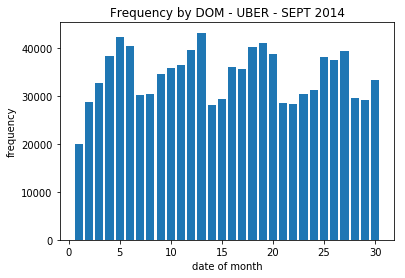

In [19]:
hist(data.dom,bins=30,rwidth=.8,range=(0.5,30.5))
xlabel('date of month')
ylabel('frequency')
title('Frequency by DOM - UBER - SEPT 2014')

In [20]:
def count_rows(rows):
    return len(rows)

by_date=data.groupby('dom').apply(count_rows)
by_date

dom
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

<BarContainer object of 30 artists>

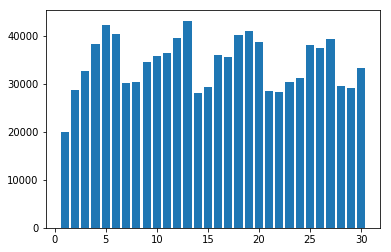

In [22]:
bar(range(1,31),by_date)

In [23]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

Text(0.5,1,'Frequency by DOM UBER SEP 2014')

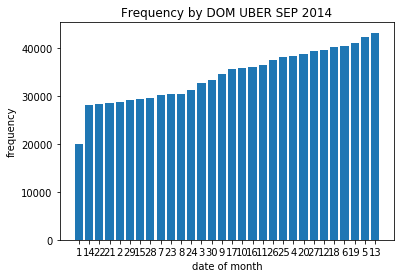

In [24]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('date of month')
ylabel('frequency')
title('Frequency by DOM UBER SEP 2014')


(array([16107., 10702., 10789., 12675., 20262., 33307., 43314., 44477.,
        38542., 37634., 38821., 39193., 45042., 52643., 61219., 68224.,
        73373., 75040., 69660., 63988., 60606., 51817., 36568.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

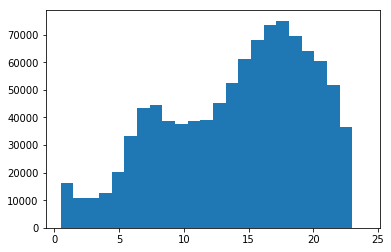

In [25]:
hist(data.hour,bins=24,range=(.5,24))

([<matplotlib.axis.XTick at 0x11fb36f0940>,
 <a list of 7 Text xticklabel objects>)

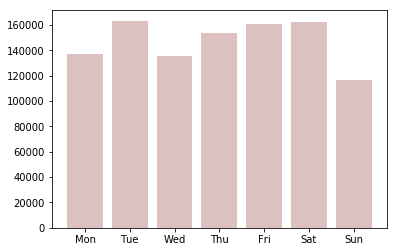

In [26]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [27]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

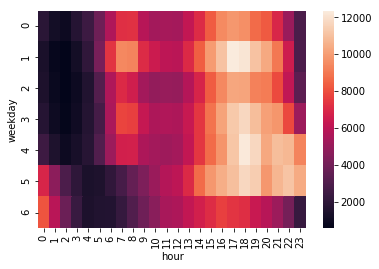

In [28]:
sns.heatmap(by_cross)

(array([1.2000e+01, 1.0000e+01, 4.0000e+00, 1.4000e+01, 2.2000e+01,
        1.4000e+01, 7.0000e+00, 1.3000e+01, 1.6000e+01, 1.8000e+01,
        1.7000e+01, 3.4000e+01, 2.4000e+01, 3.0000e+01, 6.3000e+01,
        3.9100e+02, 2.6700e+02, 4.4400e+02, 2.7500e+02, 5.0100e+02,
        5.9600e+02, 7.3900e+02, 7.4400e+02, 1.0240e+03, 1.0250e+03,
        1.0080e+03, 1.4580e+03, 1.4960e+03, 1.2842e+04, 1.3807e+04,
        1.9380e+03, 2.8470e+03, 3.9420e+03, 5.1760e+03, 9.3070e+03,
        1.1421e+04, 1.1451e+04, 1.6239e+04, 1.5795e+04, 1.0545e+04,
        1.5116e+04, 2.6922e+04, 3.1610e+04, 5.0690e+04, 6.8633e+04,
        5.8899e+04, 5.2824e+04, 5.6320e+04, 6.9987e+04, 5.9961e+04,
        6.6031e+04, 7.0820e+04, 6.9317e+04, 4.4588e+04, 5.0607e+04,
        2.9550e+04, 1.8870e+04, 1.2190e+04, 7.5910e+03, 5.4880e+03,
        4.8150e+03, 5.1500e+03, 2.8690e+03, 2.0980e+03, 2.1440e+03,
        2.4670e+03, 1.3810e+03, 1.1350e+03, 1.2980e+03, 1.2320e+03,
        1.6870e+03, 1.1750e+03, 8.0600e+02, 8.51

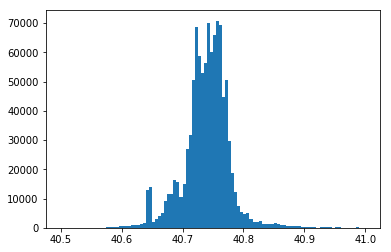

In [29]:
hist(data['Lat'],bins=100,range=(40.5,41))

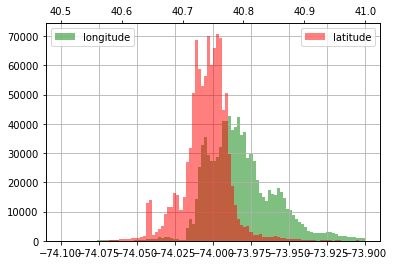

In [30]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')

(40.7, 41)

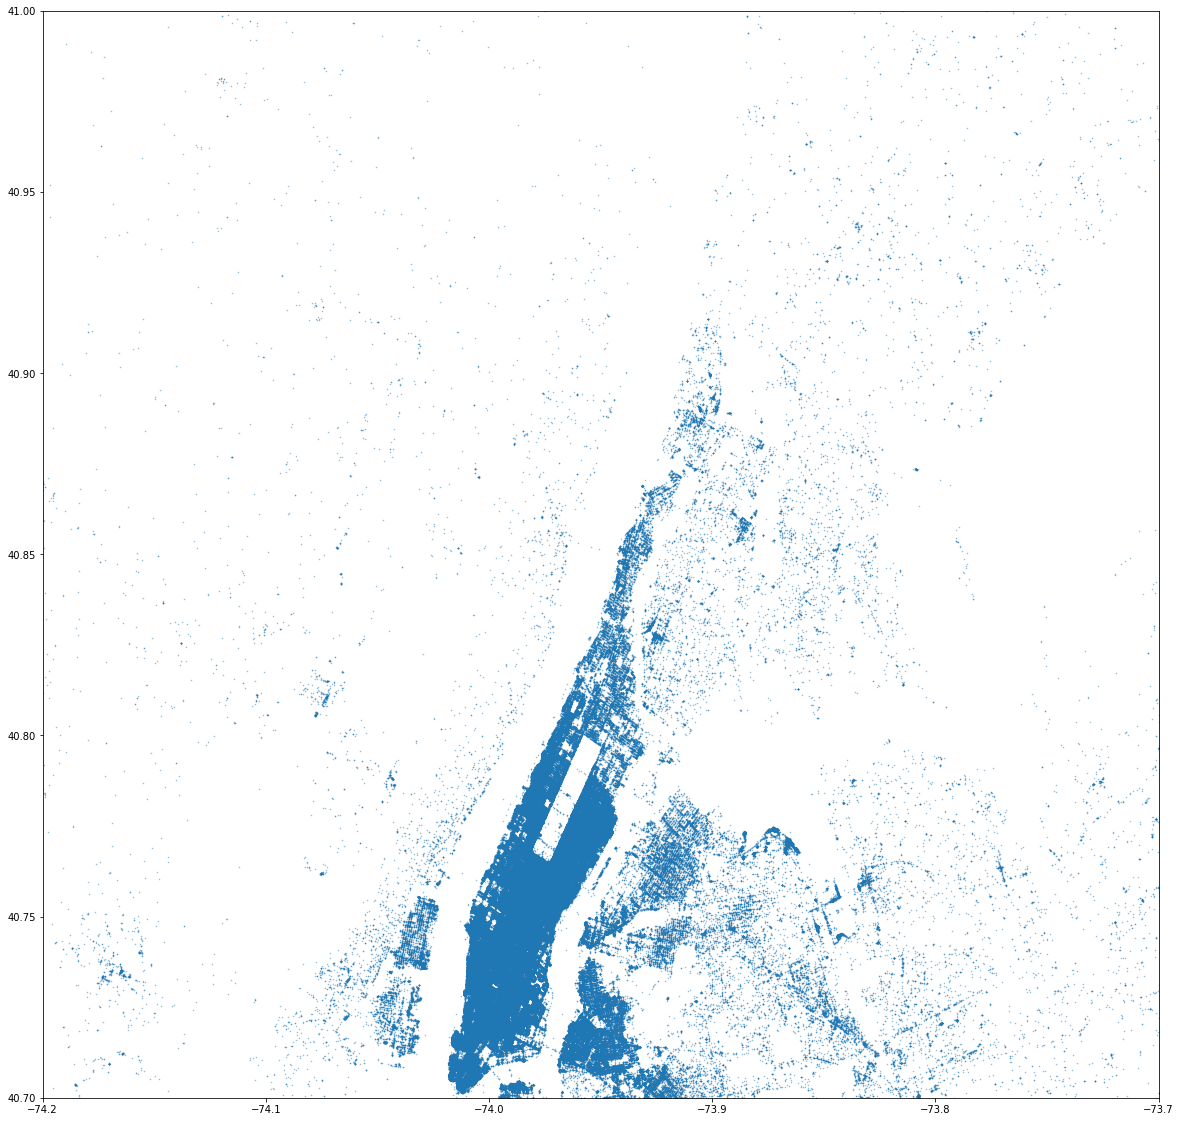

In [31]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)